In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Read data from housing.com

In [461]:
df = pd.read_csv('data_cleaned.csv')

In [462]:
df.head()

,Location,Beds,Price,Area,Type
0,Kuvempunagar,2,6400000,1010,House
1,Kuvempunagar,3,9200000,1505,House
2,Yadavagiri,3,11000000,1650,House
3,Somanatha Nagar,3,10500000,2000,House
4,Sardar Vallabh Bhai Patel Nagara,2,8800000,1200,House


In [463]:
np.mean(df['Price'])

10274230.8089701

In [464]:
df['Price_noramlized'] = [round(x/100000,2) for x in df['Price']]

In [465]:
df1 = df.copy()

In [466]:
df1[df1.Area/df.Beds < 300].head()

,Location,Beds,Price,Area,Type,Price_noramlized
9,Basavanahalli,3,6150000,643,Apartment,61.50
10,Yaraganahalli,3,7455955,796,Apartment,74.56
14,Sharadadevi Nagar,3,6400000,886,Apartment,64.00
29,Gaddige Road,3,15800000,691,Apartment,158.00
35,Metagalli,3,6235000,845,Apartment,62.35


In [467]:
df2 = df1[~(df1.Area/df.Beds < 300)]

In [468]:
df2.shape

(547, 6)

In [469]:
df2['PricePerSqft'] = df2['Price'] / df2['Area']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [470]:
df2['PricePerSqft'].describe()

count      547.000000
mean      6389.383770
std       3229.673975
min      -1081.080000
25%       4606.542882
50%       5750.000000
75%       7340.136054
max      45833.333333
Name: PricePerSqft, dtype: float64

In [471]:
# outliers are removed by discaring data that is out of one standard deviation from the data
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('Location'):
        avg = np.mean(subdf['PricePerSqft'])
        stdev = np.std(subdf['PricePerSqft'])
        reduced_df = subdf[(subdf['PricePerSqft'] > (avg-stdev)) & (subdf.PricePerSqft < (avg+stdev)) ]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [472]:
df3 = remove_pps_outliers(df2)

In [473]:
df3.shape

(320, 7)

### Price Distribution

We can observe that most of the data lie in between 25-100 Lakhs

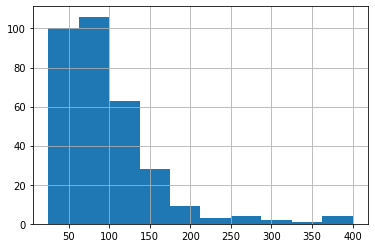

In [474]:
df3['Price_noramlized'].hist()

In [475]:
df3.describe()

,Beds,Price,Area,Price_noramlized,PricePerSqft
count,320.000000,3.200000e+02,320.000000,320.000000,320.000000
mean,2.815625,9.545695e+06,1625.890625,95.457031,6051.437902
std,1.190508,5.915030e+06,1001.895563,59.150292,1585.988451
min,1.000000,2.500000e+06,420.000000,25.000000,2400.000000
25%,2.000000,5.800000e+06,1100.000000,58.000000,4963.807353
50%,3.000000,7.500000e+06,1202.000000,75.000000,5818.181818
75%,3.000000,1.200000e+07,2000.000000,120.000000,6971.518987
max,10.000000,4.000000e+07,7200.000000,400.000000,11785.714286


In [476]:
df3.head()

,Location,Beds,Price,Area,Type,Price_noramlized,PricePerSqft
0,Alanahalli Village,1,4000000,600,House,40.0,6666.666667
1,Alanahalli Village,3,8000000,1400,House,80.0,5714.285714
2,Alanahalli Village,2,7400000,1250,House,74.0,5920.000000
3,BEML Nagar,3,12000000,2200,House,120.0,5454.545455
4,BEML Nagar,3,12800000,2200,House,128.0,5818.181818


### Read 99acres.com data

In [477]:
data_1 = pd.read_csv('..\data_99acres\data_2_merge.csv')

In [478]:
data_1.head()

,Location,Beds,Price,Area,PricePerSqft
0,1st Stage Vijayanagar,2,120.0,1500.0,0.080000
1,1st Stage Vijayanagar,5,68.0,1900.0,0.035789
2,1st Stage Vijayanagar,5,250.0,2400.0,0.104167
3,1st Stage Vijayanagar,4,45.0,1200.0,0.037500
4,1st Stage Vijayanagar,4,25.0,600.0,0.041667


In [479]:
df3['Type'].unique()

array(['House', 'Apartment', 'Villa'], dtype=object)

In [480]:
data_2 = df3.drop(['Type'],1)

In [481]:
data_2.drop(['Price_noramlized'],1,inplace=True)

In [482]:
data_2.Price = round(data_2.Price/100000,2)

In [483]:
data_2.PricePerSqft = round(data_2.PricePerSqft/100000,2)

In [484]:
data_2.head()

,Location,Beds,Price,Area,PricePerSqft
0,Alanahalli Village,1,40.0,600,0.07
1,Alanahalli Village,3,80.0,1400,0.06
2,Alanahalli Village,2,74.0,1250,0.06
3,BEML Nagar,3,120.0,2200,0.05
4,BEML Nagar,3,128.0,2200,0.06


In [485]:
data_combined = pd.concat([data_1,data_2])

In [486]:
df = data_combined[~(data_combined['Location'] == 'Sr')]
df = df[~(df['Location'] == 'Mysore')]
df['Location'] = df['Location'].apply(lambda x : 'Hebbal' if('hebbal' in x.lower()) else x)
df['Location'] = df['Location'].apply(lambda x : 'Bannimantap' if('mantap' in x.lower()) else x)
df['Location'] = df['Location'].apply(lambda x : 'Dattagalli' if('datta' in x.lower()) else x)
df['Location'] = df['Location'].apply(lambda x : 'JP Nagar' if('p nagar' in x.lower()) else x)
df['Location'] = df['Location'].apply(lambda x : 'Gokulam' if('gokulam' in x.lower()) else x)
df['Location'] = df['Location'].apply(lambda x : 'Siddarthanagar' if('siddhartha' in x.lower()) else x)
df['Location'] = df['Location'].apply(lambda x : 'Srirampura' if('sriram' in x.lower()) else x)
df['Location'] = df['Location'].apply(lambda x : 'VV Mohalla' if(('v v' in x.lower()) or ('vani' in x.lower()) or ('vonti' in x.lower())) else x)
df['Location'] = df['Location'].apply(lambda x : 'Yelawala' if(('wala' in x.lower()) or ('vala' in x.lower()) )  else x)
df['Location'] = df['Location'].apply(lambda x : 'Vivekanada Nagar' if('ivekananda Nagar' in x.lower()) else x)
df['Location'] = df['Location'].apply(lambda x : 'BEML' if('beml' in x.lower()) else x)
df['Location'] = df['Location'].apply(lambda x : 'Bogadi' if('bogadi' in x.lower()) else x)
df['Location'] = df['Location'].apply(lambda x : 'Deepanagar' if('eepanagar' in x.lower()) else x)
df['Location'] = df['Location'].apply(lambda x : 'Jayalakshmipuram' if('ayalakshmipuram' in x.lower()) else x)
df['Location'] = df['Location'].apply(lambda x : 'Kesare' if('esare' in x.lower()) else x)
df['Location'] = df['Location'].apply(lambda x : 'Kuvempunagar' if('uvempunagar' in x.lower()) else x)
df['Location'] = df['Location'].apply(lambda x : 'Lakshmipuram' if(' Lakshmipuram' == x) else x)
df['Location'] = df['Location'].apply(lambda x : 'Ramakrishnanagar' if('amakrishnanagar' in x.lower()) else x)
df['Location'] = df['Location'].apply(lambda x : 'Vidyaranyapuram' if('aranya' in x.lower()) else x)
df['Location'] = df['Location'].apply(lambda x : 'Yadavagiri' if('adavagiri' in x.lower()) else x)
df['Location'] = df['Location'].apply(lambda x : 'Chamarajapuram' if('cham' in x.lower()) else x)
df['Location'] = df['Location'].apply(lambda x : 'Somanatha Nagar' if('omanatha nagar' in x.lower()) else x)
df['Location'] = df['Location'].apply(lambda x : 'Vijayanagar' if('vijay' in x.lower()) else x)

df.to_csv('combined_cleaned.csv',index=False)

In [554]:
data = pd.read_csv('combined_cleaned.csv')
data.describe()

,Beds,Price,Area,PricePerSqft
count,592.000000,592.000000,592.000000,592.000000
mean,2.939189,99.083209,2325.804899,0.088282
std,1.278357,67.159910,10194.640608,0.505922
min,1.000000,15.000000,12.000000,0.000149
25%,2.000000,60.000000,1100.000000,0.048843
50%,3.000000,78.000000,1225.000000,0.060000
75%,3.000000,120.000000,2000.000000,0.079167
max,12.000000,700.000000,174240.000000,12.333333


In [555]:
data.nunique()

Location         64
Beds             10
Price           167
Area            203
PricePerSqft    228
dtype: int64

In [556]:
location_stats = data.groupby('Location')['Location'].agg('count').sort_values(ascending=False)

In [557]:
location_stats[location_stats <= 2]

Location
Basavanahalli                       2
Yaraganahalli                       2
Vishweshwara Nagar                  2
Fort Mohalla                        2
Gayathripuram                       2
Srirangapatna                       2
Mandi Mohalla                       2
N R Mohalla                         2
Sardar Vallabh Bhai Patel Nagara    2
Rajarajeshwari Nagar                2
Police layout                       2
Madagalli                           2
Huyilalu                            1
Sardar Vallabh Bhai Patel Nagar     1
Hanchya                             1
Allanahalli Layout                  1
Jss Layout                          1
Rajendra Nagar                      1
 KC Layout                          1
Vivekananda Nagar                   1
 Hulikere                           1
Sharadadevi Nagar                   1
Name: Location, dtype: int64

In [558]:
import seaborn as sns
import matplotlib.pyplot as plt

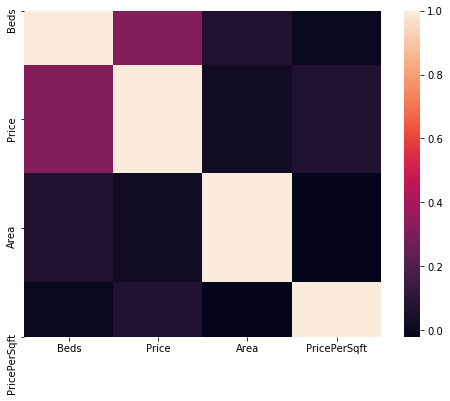

In [559]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr())
plt.show()

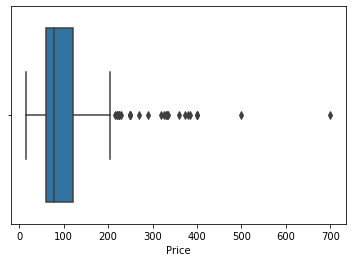

In [560]:
sns.boxplot(data['Price'],)

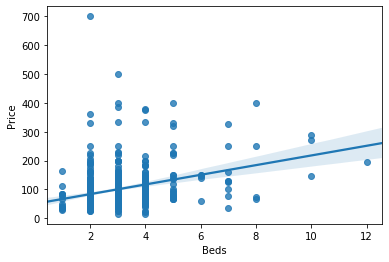

In [561]:
sns.regplot( data.Beds,data.Price ) 

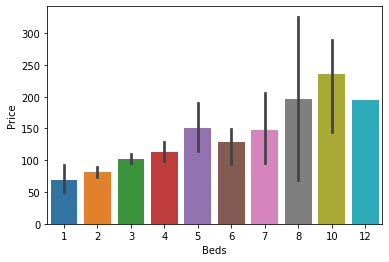

In [562]:
sns.barplot(x = data.Beds, y = data.Price)

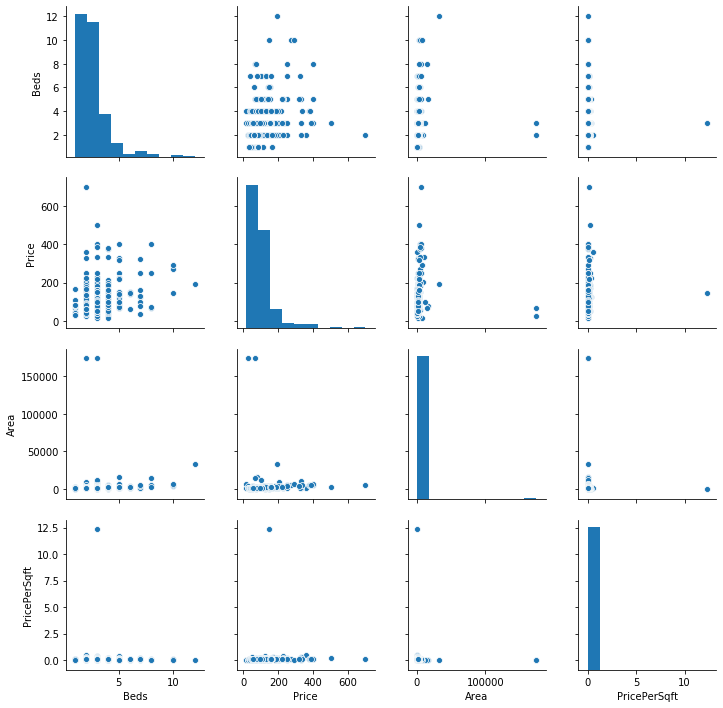

In [563]:
sns.pairplot(data)

In [26]:
data = pd.read_csv('combined_cleaned.csv')

In [3]:
location_dummies = pd.get_dummies(data['Location'])
beds_dummies = pd.get_dummies(data['Beds'])
#data_encode = data

In [4]:
data_encode = pd.concat([data.drop('Location',axis='columns'), location_dummies,beds_dummies],axis='columns')

In [5]:
data_encode.shape

(592, 78)

In [6]:
data_encode.head()

,Beds,Price,Area,PricePerSqft,Alanahalli Village,Gaddige Road,Hulikere,KC Layout,Saraswathipuram,Vivekananda Nagar,...,1,2,3,4,5,6,7,8,10,12
0,2,120.0,1500.0,0.080000,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,5,68.0,1900.0,0.035789,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,5,250.0,2400.0,0.104167,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,4,45.0,1200.0,0.037500,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,4,25.0,600.0,0.041667,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [7]:
#X = data_encode.drop(['Price','Location'],axis = 'columns')
X = data_encode.drop(['Price','Beds'],axis = 'columns')

In [8]:
from sklearn import preprocessing
#X = preprocessing.scale(X_up)

In [9]:
y = data_encode.Price
y.head()

0    120.0
1     68.0
2    250.0
3     45.0
4     25.0
Name: Price, dtype: float64

### Split the data into training and testing 

In [14]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.05,random_state=10)

In [15]:
from sklearn.linear_model import LinearRegression

lnr_clf = LinearRegression()
lnr_clf.fit(X_train,y_train)
lnr_clf.score(X_test,y_test)

c:\users\mkart\onedrive\documents\python\mysore_real_estate_price\venv\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
c:\users\mkart\onedrive\documents\python\mysore_real_estate_price\venv\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: h

-0.06021256483947379

We can observe the LinearRegression Scores and clearly it performs bad for the given dataset

### Lets perform cross validation on the dataset

In [16]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([-1.73125500e+02,  1.60108469e-02, -2.83449523e+09, -1.53219758e-01,
       -8.21286384e-02])

In [17]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse','mae'],
                'splitter': ['best','random']
            }
        },
        'random_forest':{
            'model':RandomForestRegressor(),
           'params' : { 
                'n_estimators': [200, 500],
                'max_features': ['auto', 'sqrt', 'log2'],
                'max_depth' : [4,5,6,7,8],
                'criterion' :['mae', 'mse']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=4, test_size=0.2, random_state=20)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)


c:\users\mkart\onedrive\documents\python\mysore_real_estate_price\venv\lib\site-packages\sklearn\decomposition\online_lda.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps
c:\users\mkart\onedrive\documents\python\mysore_real_estate_price\venv\lib\site-packages\sklearn\ensemble\gradient_boosting.py:32: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/relea

KeyboardInterrupt: 

#### Observation:

The results of gridsearch cv indicates the scores and the best performers are Decision tree and random forest regressor. Decision tree suffers from high varience. Random forest overcomes this limitation by decreasing the varience.

### Final Model

In [18]:
config = {
            'model':RandomForestRegressor(),
           'params' : { 
                'n_estimators': [200, 500],
                'max_features': ['auto', 'sqrt', 'log2'],
                'max_depth' : [4,5,6,7,8],
                'criterion' :['mae','mse'],
                'n_jobs' : [-1]
            }
}

cv = ShuffleSplit(n_splits=4, test_size=0.2, random_state=20)
gs =  GridSearchCV(RandomForestRegressor(),config['params'], cv=cv, return_train_score=False)
gs.fit(X,y)
print(gs.best_score_,gs.best_params_)

c:\users\mkart\onedrive\documents\python\mysore_real_estate_price\venv\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
c:\users\mkart\onedrive\documents\python\mysore_real_estate_price\venv\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to spe

c:\users\mkart\onedrive\documents\python\mysore_real_estate_price\venv\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
c:\users\mkart\onedrive\documents\python\mysore_real_estate_price\venv\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to spe

c:\users\mkart\onedrive\documents\python\mysore_real_estate_price\venv\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
c:\users\mkart\onedrive\documents\python\mysore_real_estate_price\venv\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to spe

c:\users\mkart\onedrive\documents\python\mysore_real_estate_price\venv\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
c:\users\mkart\onedrive\documents\python\mysore_real_estate_price\venv\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to spe

c:\users\mkart\onedrive\documents\python\mysore_real_estate_price\venv\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
c:\users\mkart\onedrive\documents\python\mysore_real_estate_price\venv\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to spe

c:\users\mkart\onedrive\documents\python\mysore_real_estate_price\venv\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
c:\users\mkart\onedrive\documents\python\mysore_real_estate_price\venv\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to spe

c:\users\mkart\onedrive\documents\python\mysore_real_estate_price\venv\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
c:\users\mkart\onedrive\documents\python\mysore_real_estate_price\venv\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to spe

c:\users\mkart\onedrive\documents\python\mysore_real_estate_price\venv\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
c:\users\mkart\onedrive\documents\python\mysore_real_estate_price\venv\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to spe

c:\users\mkart\onedrive\documents\python\mysore_real_estate_price\venv\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
c:\users\mkart\onedrive\documents\python\mysore_real_estate_price\venv\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to spe

c:\users\mkart\onedrive\documents\python\mysore_real_estate_price\venv\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
c:\users\mkart\onedrive\documents\python\mysore_real_estate_price\venv\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to spe

c:\users\mkart\onedrive\documents\python\mysore_real_estate_price\venv\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
c:\users\mkart\onedrive\documents\python\mysore_real_estate_price\venv\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to spe

c:\users\mkart\onedrive\documents\python\mysore_real_estate_price\venv\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
c:\users\mkart\onedrive\documents\python\mysore_real_estate_price\venv\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to spe

c:\users\mkart\onedrive\documents\python\mysore_real_estate_price\venv\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
c:\users\mkart\onedrive\documents\python\mysore_real_estate_price\venv\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to spe

c:\users\mkart\onedrive\documents\python\mysore_real_estate_price\venv\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
c:\users\mkart\onedrive\documents\python\mysore_real_estate_price\venv\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to spe

c:\users\mkart\onedrive\documents\python\mysore_real_estate_price\venv\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
c:\users\mkart\onedrive\documents\python\mysore_real_estate_price\venv\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to spe

c:\users\mkart\onedrive\documents\python\mysore_real_estate_price\venv\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
c:\users\mkart\onedrive\documents\python\mysore_real_estate_price\venv\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to spe

c:\users\mkart\onedrive\documents\python\mysore_real_estate_price\venv\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
c:\users\mkart\onedrive\documents\python\mysore_real_estate_price\venv\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to spe

c:\users\mkart\onedrive\documents\python\mysore_real_estate_price\venv\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
c:\users\mkart\onedrive\documents\python\mysore_real_estate_price\venv\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to spe

0.8786917858919385 {'criterion': 'mse', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200, 'n_jobs': -1}


In [ ]:
config = {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse','mae'],
                'splitter': ['best','random']
            }
}

cv = ShuffleSplit(n_splits=4, test_size=0.2, random_state=20)
gs =  GridSearchCV(DecisionTreeRegressor(),config['params'], cv=cv, return_train_score=False)
gs.fit(X,y)
print(gs.best_score_,gs.best_params_)

### Test the model for few properties

In [22]:
location_mean_pps = data.groupby('Location',as_index=True)['PricePerSqft'].mean()
location_list = location_mean_pps.index
location_mean_dict = {}
for location in location_list:
    location_mean_dict[location] = location_mean_pps[location] 

In [974]:
def predict_price(location,ppsqft,area,beds):    
    loc_index = np.where(X.columns==location)[0][0]
    beds_index = np.where(X.columns==beds)[0][0]

    x = np.zeros(len(X.columns))
    #x[0] = beds
    x[0] = area
    x[1] = ppsqft
    
    if loc_index >= 0:
        x[loc_index] = 1
    if beds_index >= 0:
        x[beds_index] = 1

    return gs.predict([x])[0]

In [1009]:
predict_price('Gokulam',location_mean_dict['Gokulam'],2500,3)

167.0703178661765

In [1010]:
predict_price('Bogadi',location_mean_dict['Bogadi'],2500,3)

139.38063952509125

In [1033]:
predict_price('Jayalakshmipuram',location_mean_dict['Jayalakshmipuram'],7000,4)

376.5773839999992

In [1025]:
predict_price('Vijayanagar',location_mean_dict['Vijayanagar'],2000,2)

272.8092161172162

### Lets serialize the model for practical implementation

In [21]:
import pickle

In [22]:
with open('mysore_home_prices_model.pickle','wb') as f:
    pickle.dump(gs,f)

In [23]:
import json
with open("locations.json","w") as f:
    f.write(json.dumps(location_mean_dict))

In [20]:
import json
columns = {
    'data_columns' : [col for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [25]:
location_mean_dict.keys()

dict_keys([' Alanahalli Village', ' Gaddige Road', ' Hulikere', ' KC Layout', ' Saraswathipuram', ' Vivekananda Nagar', 'Allanahalli Layout', 'BEML', 'Bannimantap', 'Basavanahalli', 'Bogadi', 'Chamarajapuram', 'Dattagalli', 'Deepanagar', 'Fort Mohalla', 'Gayathripuram', 'Gokulam', 'Hanchya', 'Hebbal', 'Hinkal', 'Hootagalli', 'Hulikere', 'Huyilalu', 'Ittige Gudu', 'JP Nagar', 'JSS Layout', 'Jayalakshmipuram', 'Jayanagar', 'Jss Layout', 'KRS Road', 'Kalyanagiri', 'Kesare', 'Kuvempunagar', 'Lakshmipuram', 'Madagalli', 'Mandi Mohalla', 'Metagalli', 'N R Mohalla', 'Nanjangud', 'Niveditha Nagar', 'Police layout', 'RS Naidu Nagar', 'Rajarajeshwari Nagar', 'Rajendra Nagar', 'Rajiv Nagar', 'Ramakrishnanagar', 'Saraswathipuram', 'Sardar Vallabh Bhai Patel Nagar', 'Sardar Vallabh Bhai Patel Nagara', 'Sathagalli Layout', 'Sharadadevi Nagar', 'Siddarthanagar', 'Somanatha Nagar', 'Srirampura', 'Srirangapatna', 'Udayagiri', 'VV Mohalla', 'Vidyaranyapuram', 'Vijayanagar', 'Vishweshwara Nagar', 'Viveka

In [36]:
avg_loc_bed = data.groupby(['Location','Beds'])['Price'].mean()
data.groupby(['Location','Beds'])['Price'].mean()

Location             Beds
 Alanahalli Village  1        40.0000
                     2        74.0000
                     3        80.0000
 Gaddige Road        3       110.1350
                     4       374.0200
                               ...   
Yaraganahalli        3        92.5000
Yelawala             1        30.0000
                     2        61.7000
                     3        86.5075
                     4       170.0000
Name: Price, Length: 166, dtype: float64

In [43]:
avg_loc_bed['Hulikere'][4]

KeyError: 4